In [1]:
# from qutip.cy.piqs import j_min, j_vals, m_vals, jspin
from qutip.piqs import *
import numpy as np
from itertools import product
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress
import matplotlib.pyplot as plt
from qutip import *

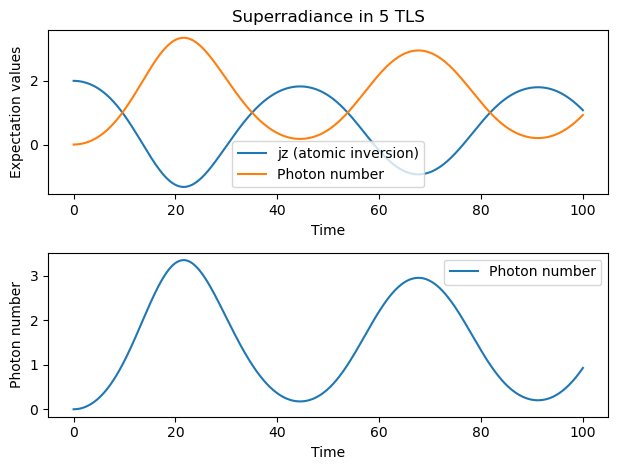

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Number of two-level systems (TLS)
N = 5

# Operators for TLS
jx, jy, jz = jmat(N // 2, 'x'), jmat(N // 2, 'y'), jmat(N // 2, 'z')

# Field operators
a = destroy(10)  # Destruction operator for 10 Fock states

# Hamiltonian
omega_0 = 1.0  # Atomic transition frequency
omega = 1.0  # Field frequency
g = 0.1  # Coupling strength

# Combine the operators in the Hamiltonian so they act on the full Hilbert space
H_atom = tensor(omega_0 * jz, qeye(10))
H_field = tensor(qeye(jz.dims[0][0]), omega * a.dag() * a)
H_interaction = g * (tensor(jx, a.dag()) + tensor(jx, a))

H = H_atom + H_field + H_interaction

# Initial state: All atoms in excited state, field in vacuum state
psi_atom = basis(jz.dims[0][0], 0)  # All atoms in excited state (j = N//2, m = N//2)
psi_field = fock(10, 0)  # Field in vacuum state
psi0 = tensor(psi_atom, psi_field)

# Time list
tlist = np.linspace(0, 100, 1000)

# Define operators to compute expectation values
exp_op1 = tensor(jz, qeye(10))
exp_op2 = tensor(qeye(jz.dims[0][0]), a.dag() * a)

# Evolve the system
result = mesolve(H, psi0, tlist, [], [exp_op1, exp_op2])

# Plot results
plt.figure()
plt.subplot(211)
plt.title("Superradiance in 5 TLS")
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.plot(tlist, result.expect[0], label="jz (atomic inversion)")
plt.plot(tlist, result.expect[1], label="Photon number")
plt.legend()

plt.subplot(212)
plt.xlabel("Time")
plt.ylabel("Photon number")
plt.plot(tlist, result.expect[1])
plt.legend(["Photon number"])

plt.tight_layout()
plt.show()


In [58]:
jspin(2, basis="uncoupled")

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0.  0.5 0.5 0. ]
  [0.5 0.  0.  0.5]
  [0.5 0.  0.  0.5]
  [0.  0.5 0.5 0. ]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0.+0.j  0.-0.5j 0.-0.5j 0.+0.j ]
  [0.+0.5j 0.+0.j  0.+0.j  0.-0.5j]
  [0.+0.5j 0.+0.j  0.+0.j  0.-0.5j]
  [0.+0.j  0.+0.5j 0.+0.5j 0.+0.j ]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0. -1.]]]

In [66]:
m_vals(1)

array([-1,  0,  1])

In [69]:
[jx, jy, jz] = jmat(4)

In [70]:
jz

Quantum object: dims = [[9], [9]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -4.]]

In [29]:
jz.dims[0][0]

9

In [14]:
jz*basis(jz.dims[0][0], 0)

Quantum object: dims = [[7], [1]], shape = (7, 1), type = ket
Qobj data =
[[3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [15]:
jz*basis(jz.dims[0][0], (jz.dims[0][0])//2)

Quantum object: dims = [[7], [1]], shape = (7, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [43]:
psi_atom = basis(jz.dims[0][0], (jz.dims[0][0])//2)
psi_field = fock(max_bosons+1, 0)  # Field in vacuum state
psi0 = tensor(psi_atom, psi_field)

In [44]:
psi0

Quantum object: dims = [[9, 3], [1, 1]], shape = (27, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [40]:
psi_field

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [42]:
max_bosons=2

In [34]:
a = destroy(3)

In [35]:
a.dag() * a

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]

In [77]:


# Number of two-level systems (TLS)
N = 8
# Number bosons
max_bosons = 4

# Operators for TLS
jx, jy, jz = jmat(N /2)

# Field operators
a = destroy(max_bosons+1)  # Destruction operator for 10 Fock states

# Hamiltonian
omega_0 = 2.5  # Atomic transition frequency
omega = 1.0  # Field frequency
g = 0.01  # Coupling strength

# Combine the operators in the Hamiltonian so they act on the full Hilbert space
H_atom = tensor(qeye(max_bosons+1), omega_0 * jz)
H_field = tensor(omega * (a.dag() * a + 0.5), qeye(jz.dims[0][0]))
# H_interaction = g * (tensor(jx, a.dag()) + tensor(jx, a))
H_interaction = g * tensor((a.dag() + a), qeye(jz.dims[0][0]))*tensor(qeye(max_bosons+1),jx)

possible_ns = range(0, max_bosons+1)
possible_ms = range(0, N+1)
nm_list = [(n,m) for (n,m) in product(possible_ns, possible_ms)]

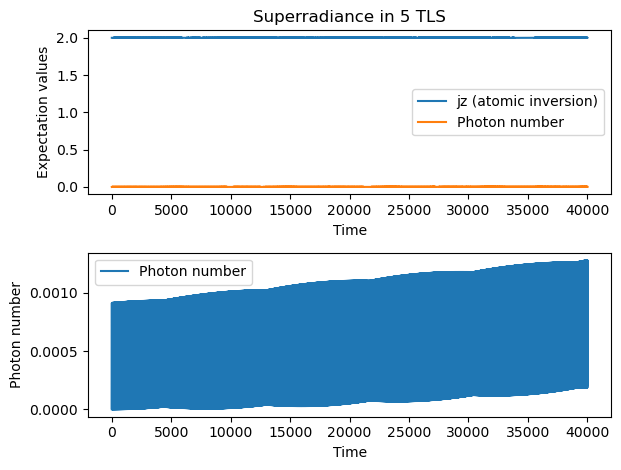

In [78]:

 

H = H_atom + H_field + H_interaction

# Initial state: All atoms in excited state, field in vacuum state
# psi_atom = basis(jz.dims[0][0], 0)  # All atoms in excited state (j = N/2, m = N/2)
# psi_atom = basis(jz.dims[0][0], (jz.dims[0][0])//2)
psi_atom = basis(jz.dims[0][0], 2)
psi_field = fock(max_bosons+1, 0)  # Field in vacuum state
psi0 = tensor(psi_field, psi_atom)

# Time list
tlist = np.linspace(0,  40000, 400000)

# Define operators to compute expectation values
exp_op1 = tensor(qeye(max_bosons+1), jz)
exp_op2 = tensor(a.dag() * a, qeye(jz.dims[0][0]))

# Evolve the system
result = mesolve(H, psi0, tlist, [], [exp_op1, exp_op2])

# Plot results
plt.figure()
plt.subplot(211)
plt.title("Superradiance in 5 TLS")
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.plot(tlist, result.expect[0], label="jz (atomic inversion)")
plt.plot(tlist, result.expect[1], label="Photon number")
plt.legend()

plt.subplot(212)
plt.xlabel("Time")
plt.ylabel("Photon number")
plt.plot(tlist, result.expect[1])
plt.legend(["Photon number"])

plt.tight_layout()
plt.show()


In [293]:
tlist[result.expect[1].argmax()]

57.615230460921836

In [ ]:
2 222
4 167
10 112
20 81
30 66
40 58


In [276]:
rate = [1/222, 2/167, 5/112, 10/81, 15/66, 20/58]

In [277]:
N = [2, 4, 10, 20, 30, 40]

In [287]:
super = pd.DataFrame(data={"N":N, "rate":rate})


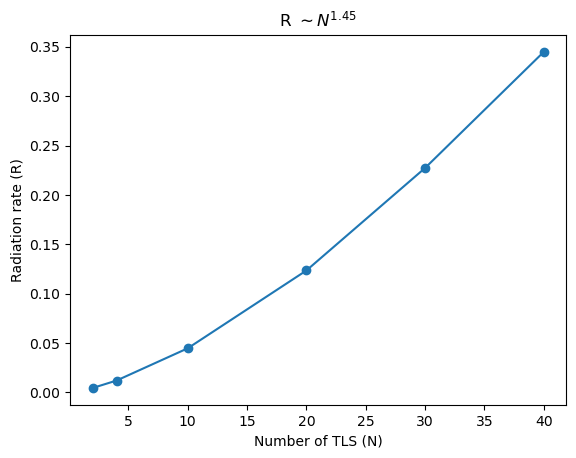

In [307]:
ax = super.plot(x="N",y="rate", title="R $\sim N^{1.45}$ ", legend=False, style='o-');
ax.set_xlabel("Number of TLS (N)");
ax.set_ylabel("Radiation rate (R)");

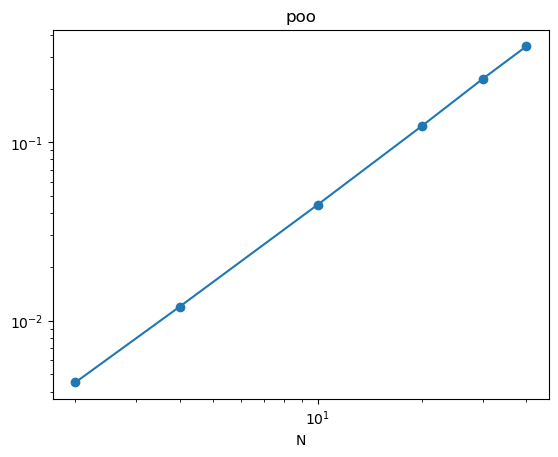

In [289]:
ax = super.plot(x="N",y="rate", logy = True,logx = True, title=f"poo", legend=False, style='o-');
# ax.set_xlabel("N");

In [286]:
linregress(np.log10(super["N"]), np.log10(super["rate"])).slope

1.450420934010119

In [ ]:
1 45
2 43
10 42
20 40
30 39
40 38
50 36

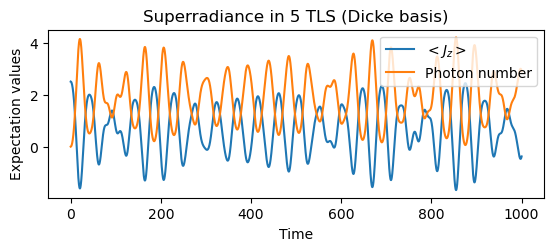

In [74]:
from qutip import *
from qutip.piqs import *

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 5
omega_0 = 1.0
omega = 1.0
g = 0.1

# Collective spin operators in the Dicke basis
[jx, jy, jz] = jspin(N, basis="dicke")

# Field operators
a = destroy(10)

# Hamiltonian
H_atom = omega_0 * jz
H_field = omega * a.dag() * a
H_int = g * (tensor(jx, a.dag()) + tensor(jx, a))

# Total Hamiltonian
H = tensor(H_atom, qeye(10)) + tensor(qeye(H_atom.shape[0]), H_field) + H_int

# Initial state: All atoms in the excited state, field in vacuum
psi_tls = dicke(N, N/2, N/2)
psi_field = ket2dm(fock(10, 0))
psi0 = tensor(psi_tls, psi_field)

# Time list
tlist = np.linspace(0, 100, 1000)

# Time evolution
result = mesolve(H, psi0, tlist, [], [tensor(jz, qeye(10)), tensor(qeye(H_atom.shape[0]), a.dag() * a)])

# Plotting results
plt.figure()
plt.subplot(211)
plt.title("Superradiance in 5 TLS (Dicke basis)")
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.plot(tlist, result.expect[0], label="$<J_z>$")
plt.plot(tlist, result.expect[1], label="Photon number")
plt.legend()
plt.show()


In [76]:
energy_degeneracy(5,1/2)

10

In [78]:
m_degeneracy(3/2,3/2)

0

In [79]:
m_degeneracy(3/2,1/2)

1

In [80]:
m_degeneracy(3/2,-1/2)

1

In [81]:
m_degeneracy(1/2,-1/2)

0

In [82]:
m_degeneracy(1/2,1/2)

0

In [83]:
num_dicke_states(3)

6

In [107]:
state_degeneracy(4,2)

1

In [110]:
state_degeneracy(4,1)

3

In [111]:
state_degeneracy(4,0)

2

In [98]:
num_dicke_ladders(4)

3

In [99]:
num_dicke_states(4)

9

In [113]:
m_vals(2)

array([-2, -1,  0,  1,  2])

In [114]:
m_vals(1)

array([-1,  0,  1])

In [115]:
m_vals(0)

array([0])

In [103]:
j_vals(4)

array([0., 1., 2.])

In [112]:
2**4

16

In [189]:
jspin(4)[2]

Quantum object: dims = [[9], [9]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]

In [191]:
jmat(2)[2]

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 2.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -2.]]

In [2]:
deltaE = 1.0  # Atomic transition frequency
omega = 1.0  # Field frequency
U = 0.01  # Coupling strength

time to transfer one = 208.05201300325083


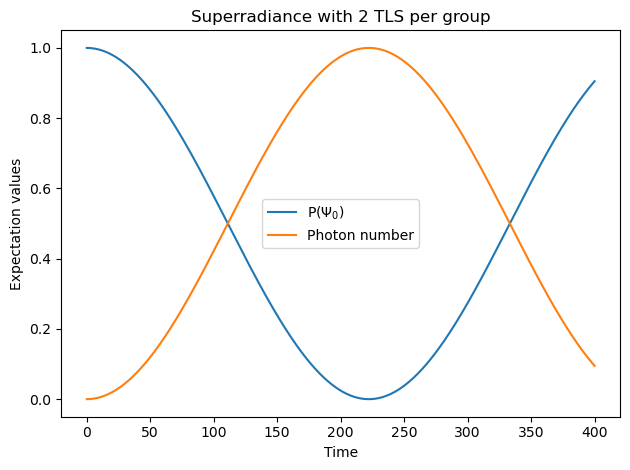

time to transfer one = 147.03675918979746


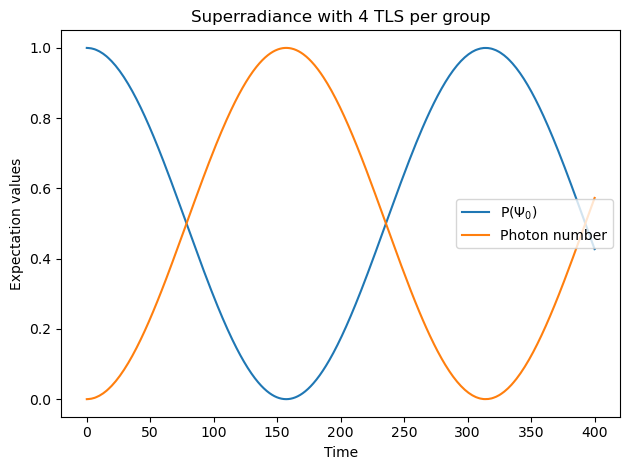

time to transfer one = 103.92598149537385


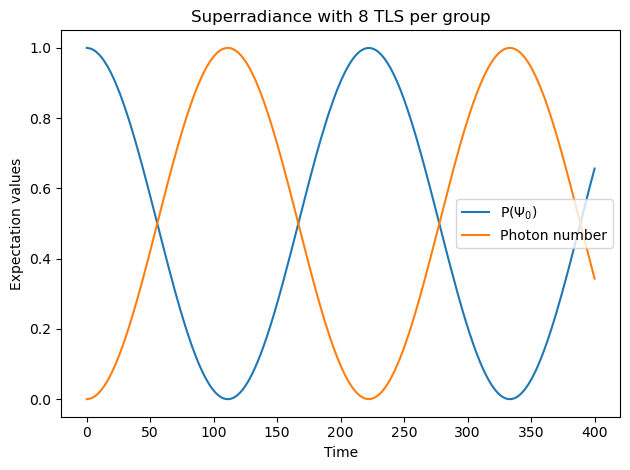

time to transfer one = 73.51837959489873


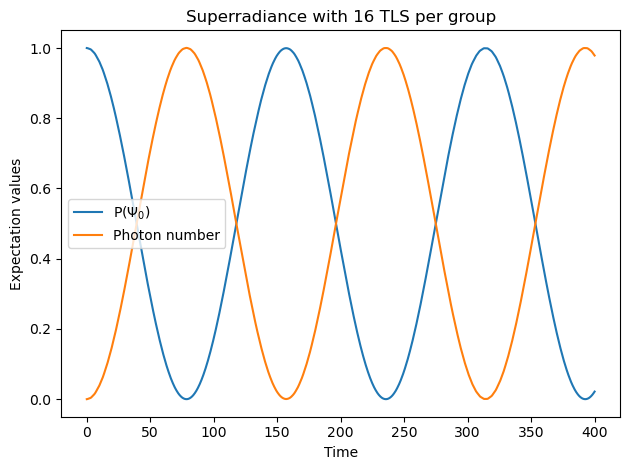

time to transfer one = 52.01300325081271


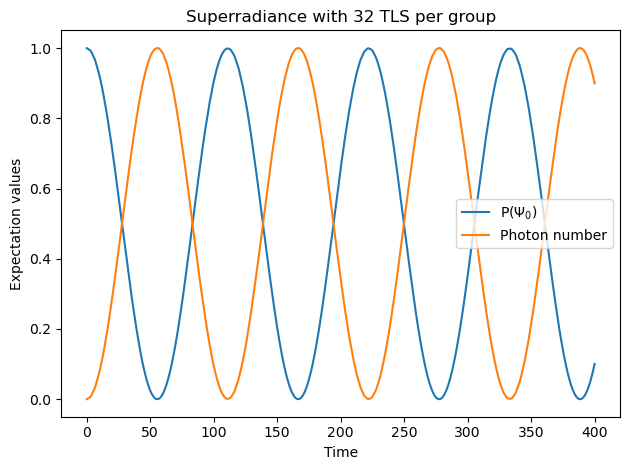

time to transfer one = 46.411602900725185


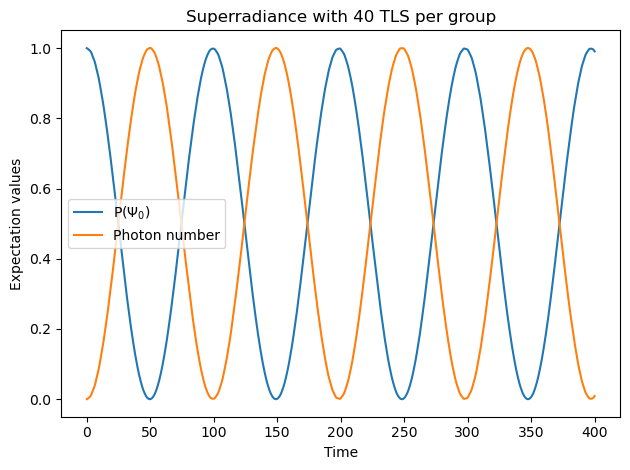

In [293]:
# Ns = [2,4,8,16,32,40]
Ns = [2,4,8,16,32,40]
transfer_times = []
rates = []
for N in Ns:
    
    # Number of two-level systems (TLS)
    # N = 8
    
    # Number
    num_excited =  1
    
    # Number bosons
    max_bosons = num_excited*2
    
    # Operators for TLS
    JA = jmat(0.5) if N==1 else jmat(N//2)
    
    # Field operators
    a = destroy(max_bosons+1)  # Destruction operator for 10 Fock states
    
    # Hamiltonian
    
    a     = tensor(destroy(max_bosons+1), qeye(JA[0].dims[0][0]))     # tensorised boson destruction operator
    JxA   = tensor(qeye(max_bosons+1), JA[0])       # tensorised 𝜎𝑥1 operator 
    JyA   = tensor(qeye(max_bosons+1), JA[1])       # tensorised 𝜎𝑥1 operator 
    JzA   = tensor(qeye(max_bosons+1), JA[2])       # tensorised 𝜎𝑥1 operator 
    
    
    two_state_A     =  JzA                                  # two state system energy operator   𝜎𝑧1/2
    bosons          = (a.dag()*a+0.5)                           # boson energy operator              𝑎†𝑎+1/2
    number          = a.dag()*a                                 # boson number operator              𝑎†𝑎
    interaction_A   = (a.dag() + a) * JxA                       # interaction energy operator       (𝑎†+𝑎)𝜎𝑥1  
    
    # Combine the operators in the Hamiltonian so they act on the full Hilbert space
    # H_atom_A = tensor(qeye(max_bosons+1), omega_0 * jzA, qeye(jzB.dims[0][0]))
    # H_atom_B = tensor(qeye(max_bosons+1), qeye(jzA.dims[0][0]), omega_0 * jzB)
    
    # H_field = tensor(omega * (a.dag() * a + 0.5), qeye(jzA.dims[0][0]), qeye(jzB.dims[0][0]))
    # # H_interaction = g * (tensor(jx, a.dag()) + tensor(jx, a))
    # H_interaction_A = g * tensor((a.dag() + a), qeye(jzA.dims[0][0]), qeye(jzB.dims[0][0])) * tensor(qeye(max_bosons+1), jxA, )
    # H_interaction_B = g * tensor((a.dag() + a), qeye(jz.dims[0][0]))*tensor(qeye(max_bosons+1), jxB)
    
    
    possible_ns = range(0, max_bosons+1)
    possible_ms = range(N, -1,-1)
    nm_list = [(n,m1) for (n,m1) in product(possible_ns, possible_ms)]
    
    
    
    # Initial state: All atoms in excited state, field in vacuum state
    # psi_atom = basis(jz.dims[0][0], 0)  # All atoms in excited state (j = N/2, m = N/2)
    # psi_atom = basis(jz.dims[0][0], (jz.dims[0][0])//2)
    psi_atom_A = basis(JA[0].dims[0][0], N-1)
    psi_field = fock(max_bosons+1, 0)  # Field in vacuum state
    psi0 = tensor(psi_field, psi_atom_A)
    
    
     
    
    H = deltaE*two_state_A  + bosons + U*interaction_A 
    
    
    # Time list
    tlist = np.linspace(0,  400, 4000)
    
    
    # Evolve the system
    result = mesolve(H, psi0, tlist, [], [psi0*psi0.dag(), number])
    # result = mesolve(H, psi0, tlist)

    time_to_half = tlist[np.where(np.abs((result.expect[0]-0.36))<0.01)[0][0]]
    time_to_transfer_one = tlist[np.where(np.abs((result.expect[1]-1))<0.01)[0][0]]
    # time_to_half = tlist[result.expect[1].argmax()]
    
    transfer_times.append(time_to_transfer_one)
    rates.append(2*np.pi / time_to_transfer_one)

    print(f"time to transfer one = {time_to_transfer_one}")

    
    
    plt.figure()
    
    plt.title(f"Superradiance with {N} TLS per group")
    plt.xlabel("Time")
    plt.ylabel("Expectation values")
    # plt.plot(tlist, result.expect[0] + N/2, label="Num A excited")
    plt.plot(tlist, result.expect[0], label="P($\Psi_0$)")
    plt.plot(tlist, result.expect[1], label="Photon number")
    plt.legend()
    
    
    plt.tight_layout()
    plt.show()



In [197]:
    JxA   = tensor(qeye(max_bosons+1), JA[0])       # tensorised 𝜎𝑥1 operator 
    JyA   = tensor(qeye(max_bosons+1), JA[1])       # tensorised 𝜎𝑥1 operator 
    JzA   = tensor(qeye(max_bosons+1), JA[2])       # tensorised 𝜎𝑥1 operator 

In [198]:
J2 = (JxA*JxA + JyA*JyA + JzA*JzA)

In [221]:
comm = commutator(H,J2)

In [222]:
np.all(comm.full() == 0)

True

In [290]:
super = pd.DataFrame(data={"N":Ns, "rate":np.multiply(rates,rates), "times":transfer_times})


In [97]:
super = pd.DataFrame(data={"N":Ns, "rate":np.reciprocal(transfer_times)})


In [291]:
linregress(np.log10(super["N"]), np.log10(super["rate"])).slope

1.9670053394583447

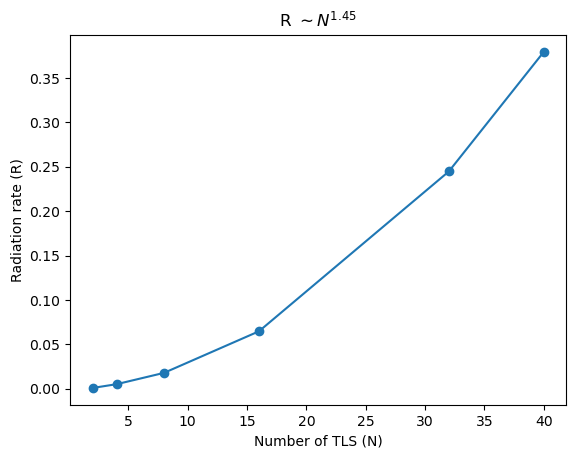

In [292]:
ax = super.plot(x="N",y="rate", title="R $\sim N^{1.45}$ ", legend=False, style='o-');
ax.set_xlabel("Number of TLS (N)");
ax.set_ylabel("Radiation rate (R)");

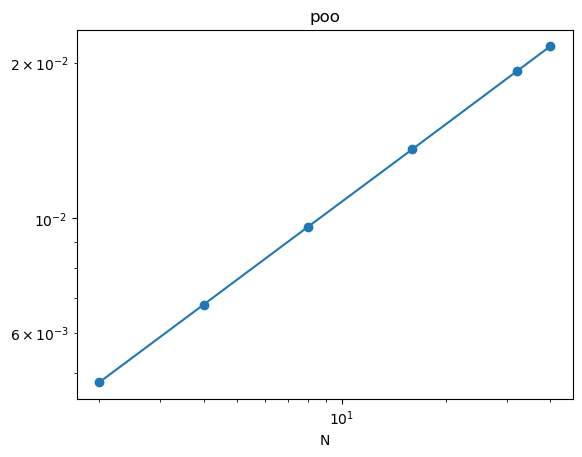

In [159]:
ax = super.plot(x="N",y="rate", logy = True,logx = True, title=f"poo", legend=False, style='o-');
# ax.set_xlabel("N");